<a href="https://colab.research.google.com/github/Gilangkantata/Rock_Paper_Scissors_Classification/blob/main/Rock_Paper_Scissors_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Diri** 

Gilang Kantata Putra

gilang.kantata.gkp@gmail.com
# New Section

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

#Import library tensorflow yang diperlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import platform, os

#Melihat versi dari Python, Tensorflow, dan Keras
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.10
Tensorflow version: 2.5.0
Keras version: 2.5.0


In [ ]:
#Akses data set
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-06-21 06:34:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   859KB/s    in 5m 14s  

2021-06-21 06:39:58 (1005 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Ekstrak zip file
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'  
out_zip = zipfile.ZipFile(local_zip, 'r') 
out_zip.extractall('/tmp')
out_zip.close()

#lokasi dataset yang digunakan
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [ ]:
#Kita dapat melihat jumlah masing-masing dari rock, paper, scissors
#Buat variable dengan memisahkan masing-masing direktori 
rock = os.path.join("/tmp/rockpaperscissors/rps-cv-images/rock")
paper = os.path.join("/tmp/rockpaperscissors/rps-cv-images/paper")
scissors = os.path.join("/tmp/rockpaperscissors/rps-cv-images/scissors")

#Menghitung jumlah masing_masing data
total_rock = len(os.listdir(rock))
total_paper = len(os.listdir(paper))
total_scissors = len(os.listdir(scissors))

#Mencetak jumlah rock paper dan scissors
print("Total rock image       : ",total_rock, " image")
print("Total paper image      : ",total_paper, " image")
print("Total scissors image   : ",total_scissors, " image")

Total rock image       :  726  image
Total paper image      :  712  image
Total scissors image   :  750  image


In [ ]:
#Ukuran validation nya 20% dari dataset
Validation_size=0.2

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=Validation_size)

In [ ]:
#Image generator
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),  
        class_mode='categorical',
        shuffle=True,
        subset='training')   #Untuk data training
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),   
        class_mode='categorical', 
        subset='validation')   #Untuk data Validasi

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
#Pembuatan model bertipe sequential
model = tf.keras.models.Sequential([
    #Konvolusi pertama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Konvolusi kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Konvolusi ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #Hiden layer dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),
    #Layer output
    tf.keras.layers.Dense(3, activation='softmax')
])

#Menampilkan model summary
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10880)            

In [ ]:
model.compile(loss='categorical_crossentropy', #Loss function yang digunakan
              optimizer=tf.optimizers.Adam(), #Fungsi optimizer
              metrics=['accuracy']) #Menampilkan akurasi model training

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=32, #Jumlah batch yang akan dieksekusi pada setiap epoch
      epochs=20, #Tambahkan nilai epoch jika akurasi belum optimal
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2,
      callbacks=[stopTraining]
)

Epoch 1/20
32/32 - 22s - loss: 0.9118 - accuracy: 0.5537 - val_loss: 0.7524 - val_accuracy: 0.7188
Epoch 2/20
32/32 - 20s - loss: 0.4757 - accuracy: 0.8345 - val_loss: 0.4049 - val_accuracy: 0.8555
Epoch 3/20
32/32 - 20s - loss: 0.3210 - accuracy: 0.8857 - val_loss: 0.4411 - val_accuracy: 0.8203
Epoch 4/20
32/32 - 20s - loss: 0.2640 - accuracy: 0.9084 - val_loss: 0.1692 - val_accuracy: 0.9336
Epoch 5/20
32/32 - 20s - loss: 0.1794 - accuracy: 0.9365 - val_loss: 0.1060 - val_accuracy: 0.9688
Epoch 6/20
32/32 - 20s - loss: 0.1382 - accuracy: 0.9570 - val_loss: 0.1824 - val_accuracy: 0.9258
Epoch 7/20
32/32 - 21s - loss: 0.1613 - accuracy: 0.9541 - val_loss: 0.1094 - val_accuracy: 0.9727
Epoch 8/20
32/32 - 21s - loss: 0.1172 - accuracy: 0.9655 - val_loss: 0.0936 - val_accuracy: 0.9727
Epoch 9/20
32/32 - 20s - loss: 0.1068 - accuracy: 0.9688 - val_loss: 0.1263 - val_accuracy: 0.9609
Epoch 10/20
32/32 - 20s - loss: 0.0857 - accuracy: 0.9775 - val_loss: 0.1071 - val_accuracy: 0.9805
Epoch 11/

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98): 
      self.model.stop_training = True

stopTraining = Callback()

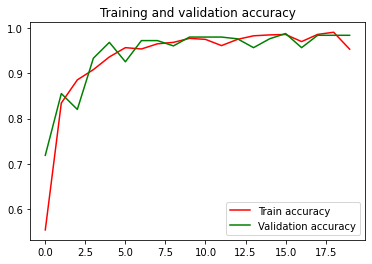

<Figure size 432x288 with 0 Axes>

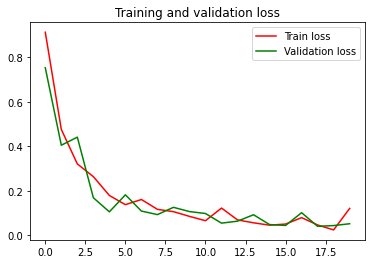

<Figure size 432x288 with 0 Axes>

In [ ]:
# Mengambil nilai accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Mengambil nilai loss 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot accruracy
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png


Hasil Prediksi :  [0. 0. 1.] 

KATEGORI GAMBAR : GUNTING


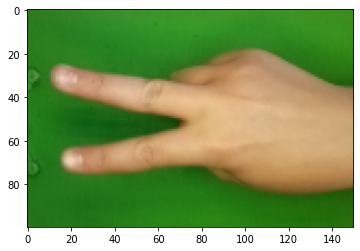

In [ ]:
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing import image

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')

  
  if classes[0][0]==1:
    print('KATEGORI GAMBAR : KERTAS')
  elif classes[0][1]==1:
    print('KATEGORI GAMBAR : BATU')
  elif classes[0][2]==1:
    print('KATEGORI GAMBAR : GUNTING')
  else:
    print('GAMBAR TIDAK DIKETAHUI')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpa71g3q4f/assets


INFO:tensorflow:Assets written to: /tmp/tmpa71g3q4f/assets


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)